Credit Card Fraud Detection by Surya Teja Nagamalla

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#dropping null values
df.dropna(inplace=True)
#checking for duplicates
df.duplicated().sum()

1081

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(283726, 31)

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

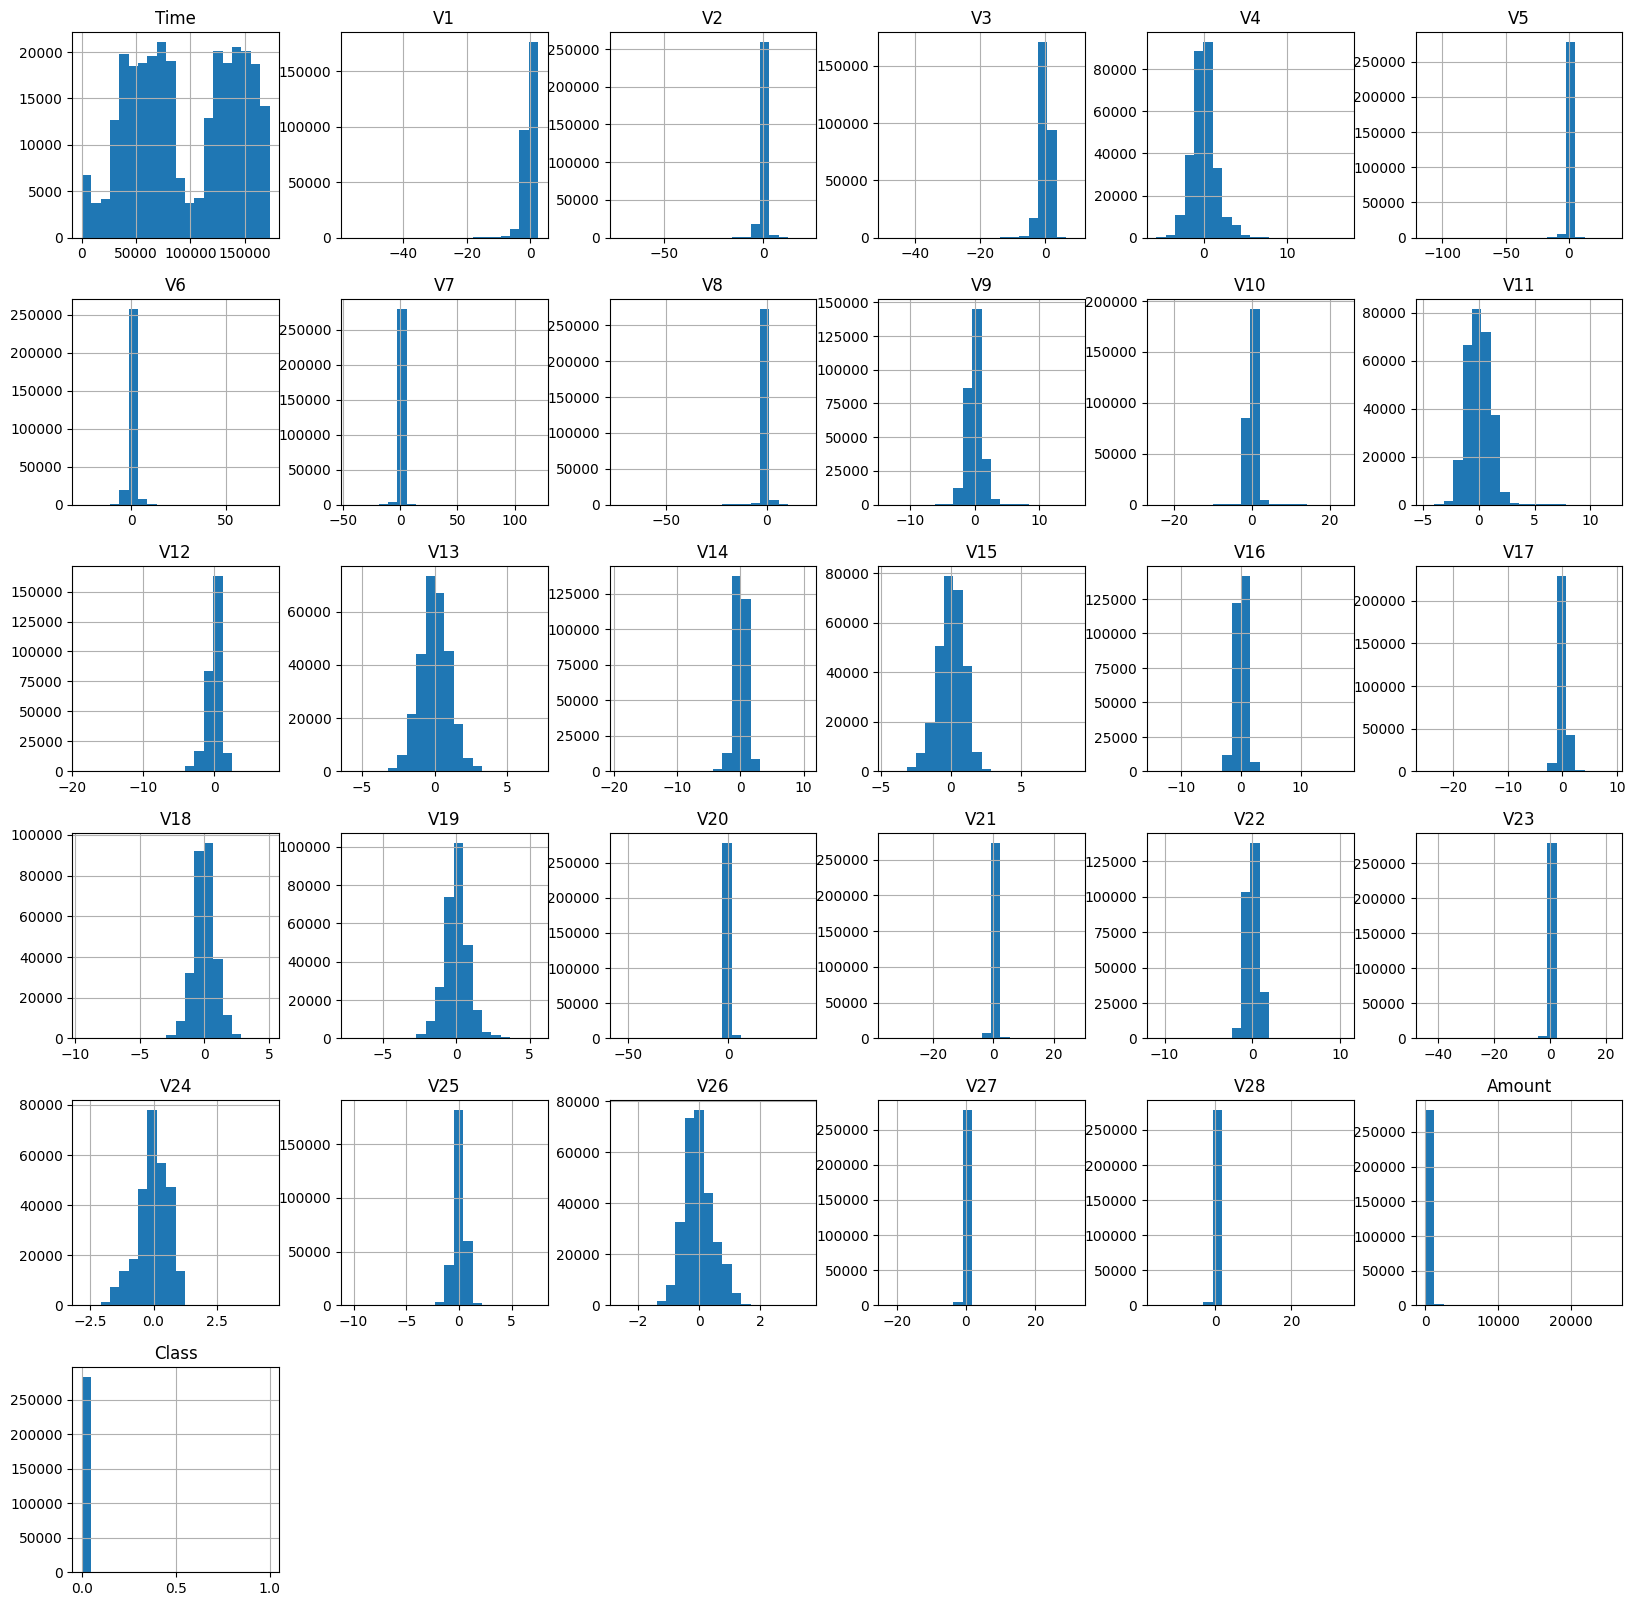

In [ ]:
#plotting histograms for all variables
df.hist(figsize=(20,20),bins=20)


<Axes: xlabel='Class', ylabel='Amount'>

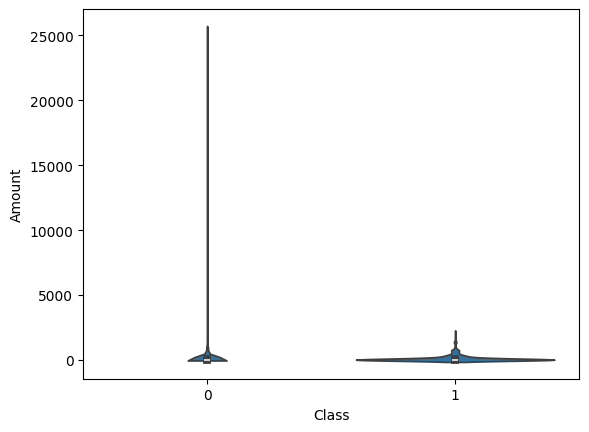

In [ ]:
#Showing Amount of transactions vs Class
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(x='Class',y='Amount',data=df)

<Axes: xlabel='Time', ylabel='Count'>

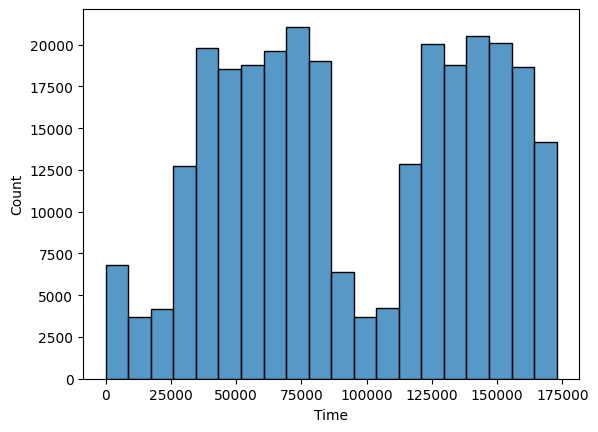

In [ ]:
sns.histplot(x='Time',data=df,bins=20)

<ipython-input-124-867a5b55e41c>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Genuine', 'Fraud'])


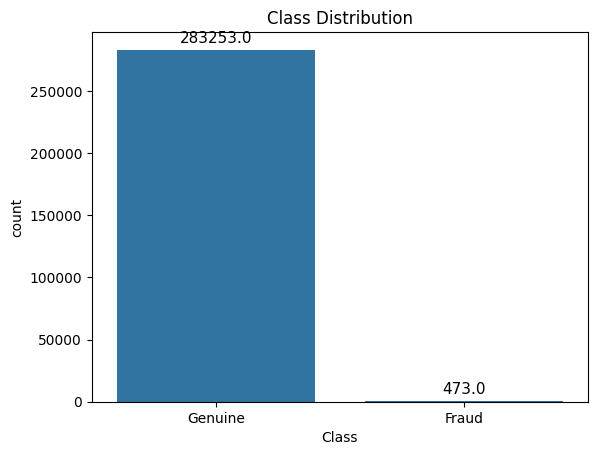

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x='Class', data=df)
ax.set_title('Class Distribution')
ax.set_xticklabels(['Genuine', 'Fraud'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [ ]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

<Axes: >

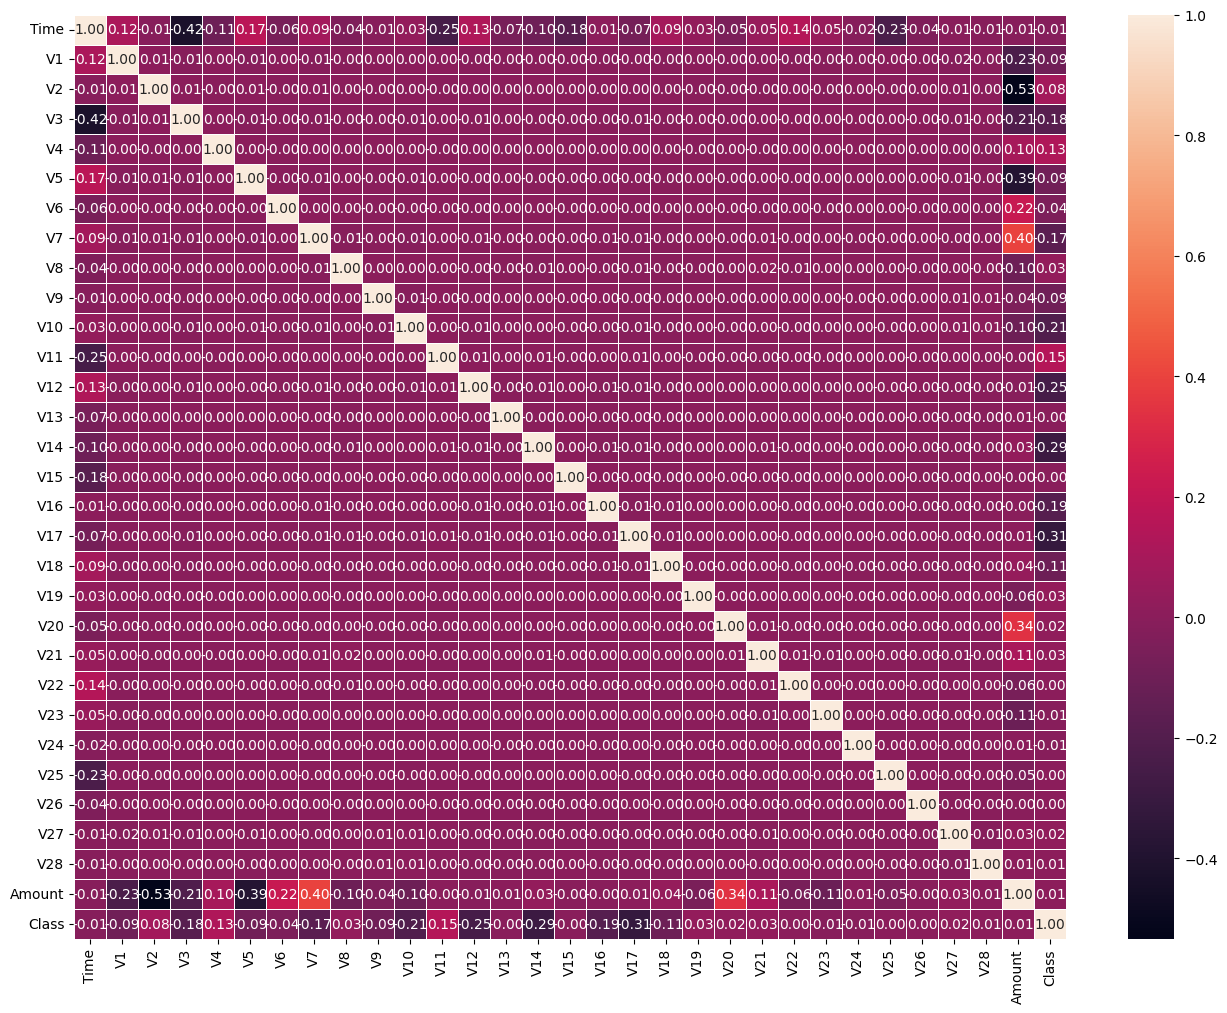

In [ ]:
plt.figure(figsize=(16, 12))

corl=df.corr()
sns.heatmap(corl,annot=True,linewidths=0.7,fmt='.2f')

In [ ]:
#Scaling time and amount columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['scaled_amount']=scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time']=scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'],axis=1,inplace=True)

In [ ]:
X=df.drop('Class',axis=1)
Y=df['Class']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


Implementing logistic and random forrest classifiers.

In [ ]:
#implementing logistic regression
from sklearn.linear_model import LogisticRegression
LG=LogisticRegression()
LG.fit(X_train,Y_train)
Y_pred=LG.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[56650     6]
 [   42    48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.53      0.67        90

    accuracy                           1.00     56746
   macro avg       0.94      0.77      0.83     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_pred,Y_test)
print(score)

0.9991541254009093


In [ ]:
#Implementing Random forrest classifier
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
Y_pred=RFC.predict(X_test)

score=accuracy_score(Y_pred,Y_test)
print(score)



0.9995594403129736


The dataset seems like imbalanaced data.Number of fraud transactions is more when compared to genuine transactions.Since I trained the model with existing dataset, I  got biased performance and got accuracy score of almost 1.I would like to consider keeping majority class information(Fraud class) and create more minority class(i.e genuine) instances for improving model performance.  so I will be proceeding through oversampling which help making the datset more manageble.


In [ ]:
#using ADASYN(Adaptive Synthetic Sampling Approach) for oversampling.
from imblearn.over_sampling import ADASYN
from sklearn.datasets import make_classification
from collections import Counter

ada = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)
X_res, Y_res = ada.fit_resample(X, Y)
print(f'Resampled dataset shape: {Counter(Y_res)}')

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res, test_size=0.2,random_state=42)


Resampled dataset shape: Counter({1: 283283, 0: 283253})


In [ ]:
 #implementing logistic regression
from sklearn.linear_model import LogisticRegression
LG=LogisticRegression()
LG.fit(X_train,Y_train)
Y_pred=LG.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_pred,Y_test)
print('The Accuracy score after over sampling for logistic regression is:',score)

The Accuracy score after over sampling for logistic regression is: 0.8874748473188124


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print('The confusion matrix after over sampling is:\n',confusion_matrix(Y_test,Y_pred))
print('The classification report after over sampling is :\n',classification_report(Y_test,Y_pred))

The confusion matrix after over sampling is:
 [[51105  5317]
 [ 7433 49453]]
The classification report after over sampling is :
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     56422
           1       0.90      0.87      0.89     56886

    accuracy                           0.89    113308
   macro avg       0.89      0.89      0.89    113308
weighted avg       0.89      0.89      0.89    113308



In [ ]:
#Implementing Random Forrest Classifier
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
Y_pred=RFC.predict(X_test)

from sklearn.metrics import accuracy_score
score=accuracy_score(Y_pred,Y_test)
print('The Accuracy score after over sampling for Random Forrest Classifier is:',score)

The Accuracy score after over sampling for Random Forrest Classifier is: 0.9998676174674339


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print('The confusion matrix after over sampling is:\n',confusion_matrix(Y_test,Y_pred))
print('The classification report after over sampling is :\n',classification_report(Y_test,Y_pred))

The confusion matrix after over sampling is:
 [[56407    15]
 [    0 56886]]
The classification report after over sampling is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56422
           1       1.00      1.00      1.00     56886

    accuracy                           1.00    113308
   macro avg       1.00      1.00      1.00    113308
weighted avg       1.00      1.00      1.00    113308

